<a href="https://colab.research.google.com/github/Shyams728/machine_learning_projects/blob/main/kannada_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Problem Statement:**
You are given a dataset of Kannada digits, and the goal is to classify these digits into one of ten classes. Kannada is a language spoken in southwestern India, and the dataset contains handwritten Kannada digits.

**Dataset:**
- The dataset consists of 60,000 images for training and 10,000 images for testing.
- Each image is in grayscale and has a size of 28x28 pixels.

**Project Procedure:**

1. **Data Loading:**
   - Extract the dataset from the NPZ file, which contains the training and testing images along with their labels.

2. **PCA Dimensionality Reduction:**
   - Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data from 28x28 (784 features) to 10 components.
   - This step is intended to reduce computational complexity while retaining as much useful information as possible.

3. **Model Selection:**
   - Implement and train the following machine learning models:
     - Decision Trees
     - Random Forest
     - Naive Bayes Model
     - K-Nearest Neighbors (K-NN) Classifier
     - Support Vector Machine (SVM)

4. **Model Evaluation:**
   - For each of the models, evaluate their performance using the following metrics:
     - Precision: Measures the ratio of true positives to the total predicted positives.
     - Recall: Measures the ratio of true positives to the total actual positives.
     - F1-Score: Combines precision and recall into a single metric.
     - Confusion Matrix: A table that shows the true positives, true negatives, false positives, and false negatives.
     - ROC-AUC Curve: Receiver Operating Characteristic curve and Area Under the Curve (AUC) to assess the model's classification performance.

5. **Experiment with Different Component Sizes:**
   - Repeat the entire experiment with different PCA component sizes (e.g., 15, 20, 25, 30) to observe how the choice of components affects model performance.
   - This step helps you understand how the trade-off between dimensionality reduction and model performance varies.

Overall, the project involves preprocessing the Kannada MNIST dataset, reducing its dimensionality with PCA, training various machine learning models, and evaluating their performance using standard classification metrics. By experimenting with different component sizes, you can gain insights into how the dimensionality reduction affects the models' abilities to classify Kannada digits accurately.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
# Function to load data from NPZ files
def load_data(file_path):
    data = np.load(file_path)
    return data["arr_0"]

# Load training and testing data
train_data = load_data("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")
test_data = load_data("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")

# Load labels
y_train = load_data("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")
y_test = load_data("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")

In [33]:
print('Training data shape:', train_data.shape)
print('test data shape:', test_data.shape)
print('y_train shape:', y_train.shape)
print('pridiction y_test shape:', y_test.shape)

Training data shape: (60000, 28, 28)
test data shape: (10000, 28, 28)
y_train shape: (60000,)
pridiction y_test shape: (10000,)


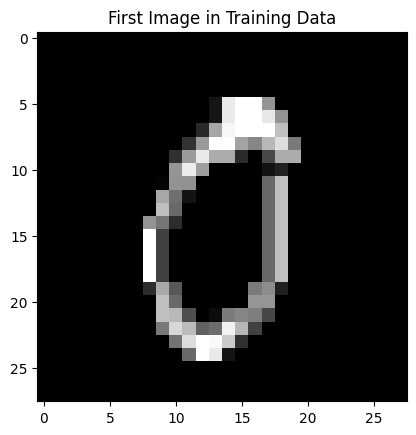

In [41]:
#show image from training data
plt.imshow(train_data[0], cmap='gray')

plt.title('First Image in Training Data')
plt.show()

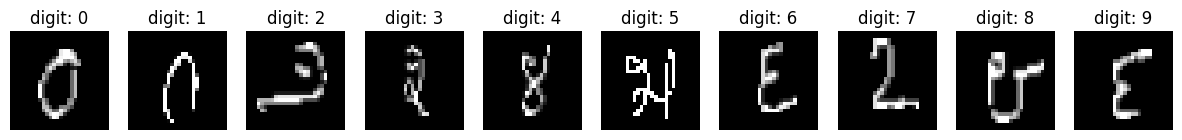

In [43]:
# Display the first 10 images side by side
num_images_to_display = 10

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    axes[i].imshow(train_data[i], cmap='gray')
    axes[i].set_title(f'digit: {y_train[i]}')
    axes[i].axis('off')

plt.show()

Total progress:   0%|          | 0/5 [00:00<?, ?model/s]

DecisionTreeClassifier (PCA-10) - Precision: 0.8126, Recall: 0.8117, F1-Score: 0.8107, ROC AUC: 0.8955


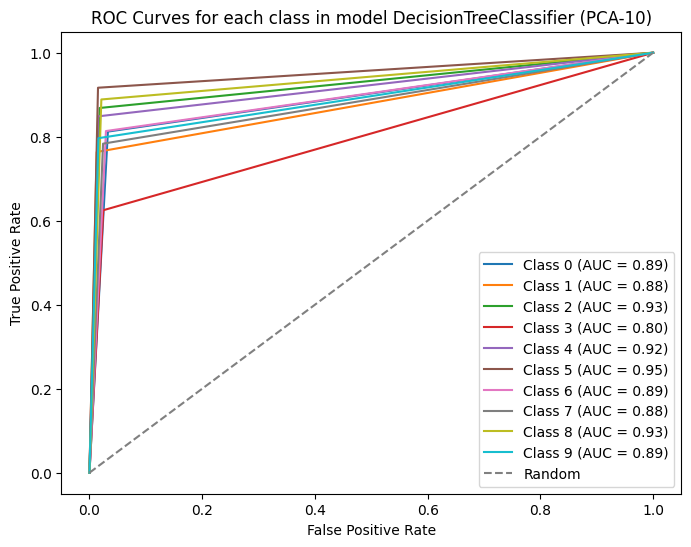

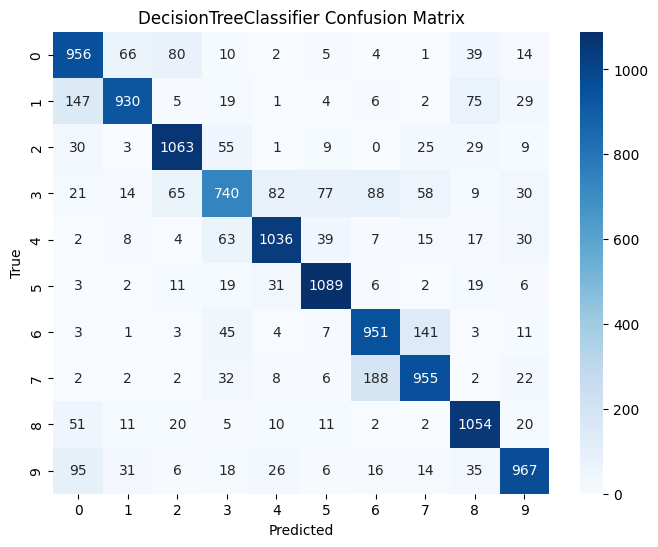


Total progress:  20%|██        | 1/5 [00:04<00:16,  4.23s/model]

RandomForestClassifier (PCA-10) - Precision: 0.9055, Recall: 0.9052, F1-Score: 0.9050, ROC AUC: 0.9945


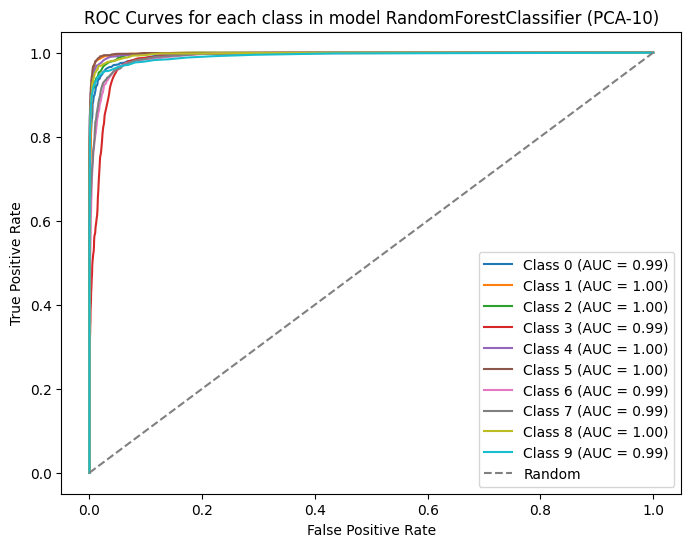

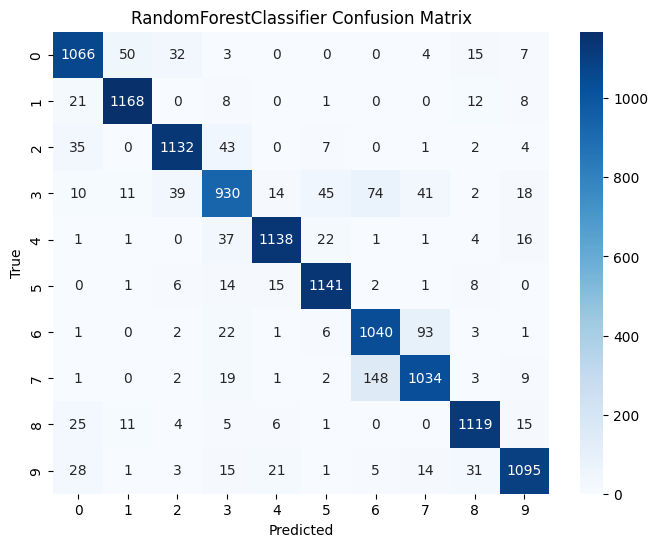


Total progress:  40%|████      | 2/5 [00:29<00:50, 16.82s/model]

MultinomialNB (PCA-10) - Precision: 0.9088, Recall: 0.9062, F1-Score: 0.9060, ROC AUC: 0.9573


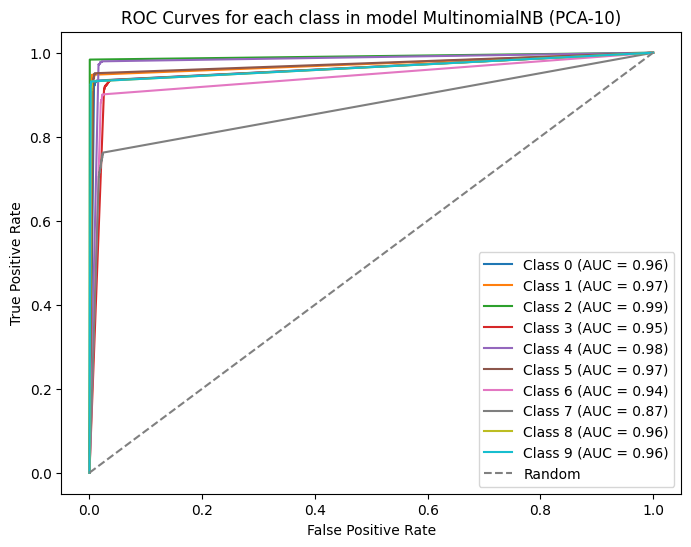

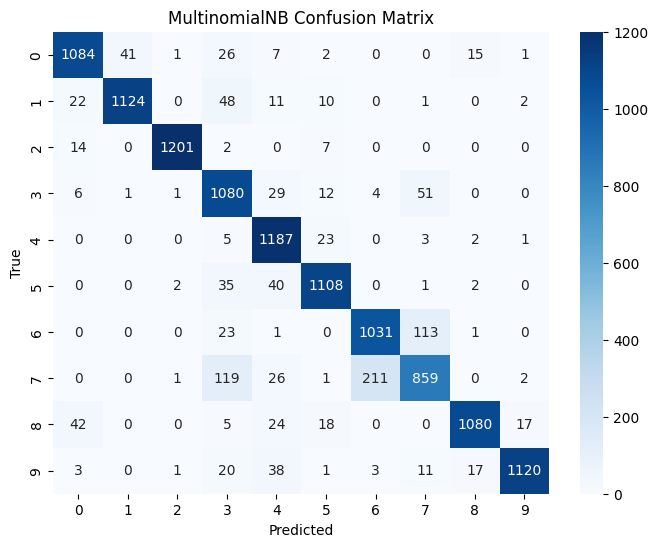


Total progress:  60%|██████    | 3/5 [00:33<00:22, 11.01s/model]

KNeighborsClassifier (PCA-10) - Precision: 0.8891, Recall: 0.8882, F1-Score: 0.8883, ROC AUC: 0.9687


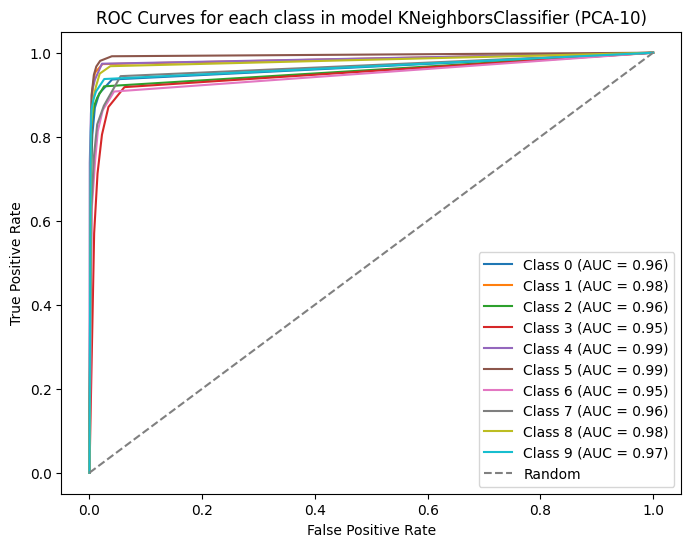

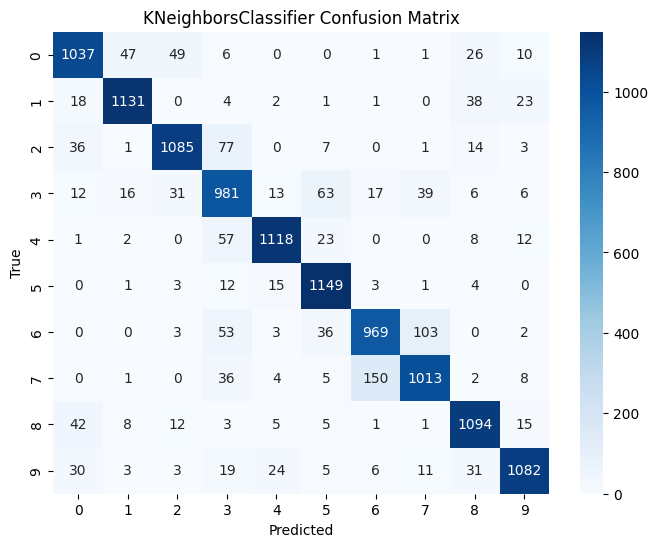


Total progress:  80%|████████  | 4/5 [00:42<00:09,  9.92s/model]

SVC (PCA-10) - Precision: 0.8882, Recall: 0.8860, F1-Score: 0.8866, ROC AUC: 0.9917


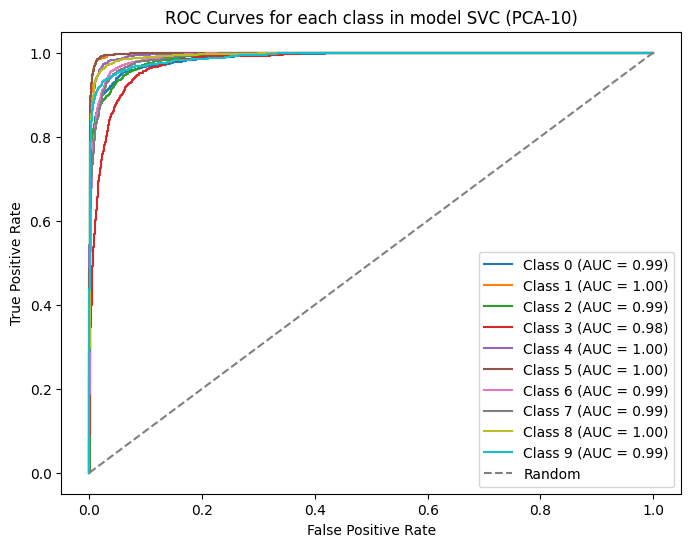

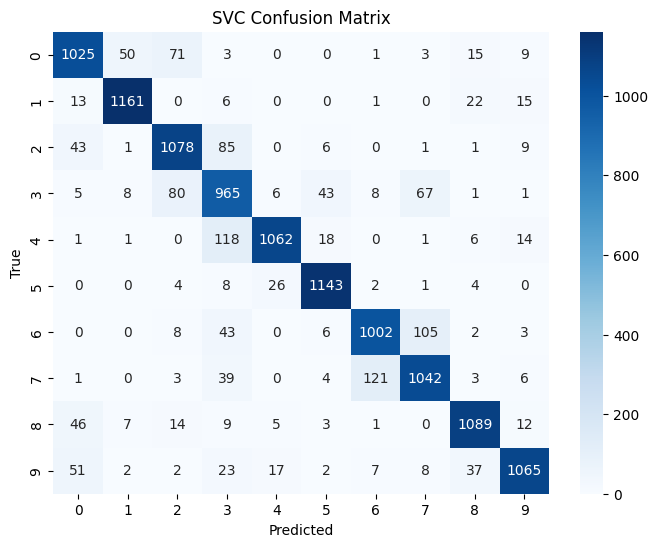


Total progress:   0%|          | 0/5 [00:00<?, ?model/s]

DecisionTreeClassifier (PCA-15) - Precision: 0.8202, Recall: 0.8198, F1-Score: 0.8186, ROC AUC: 0.8999


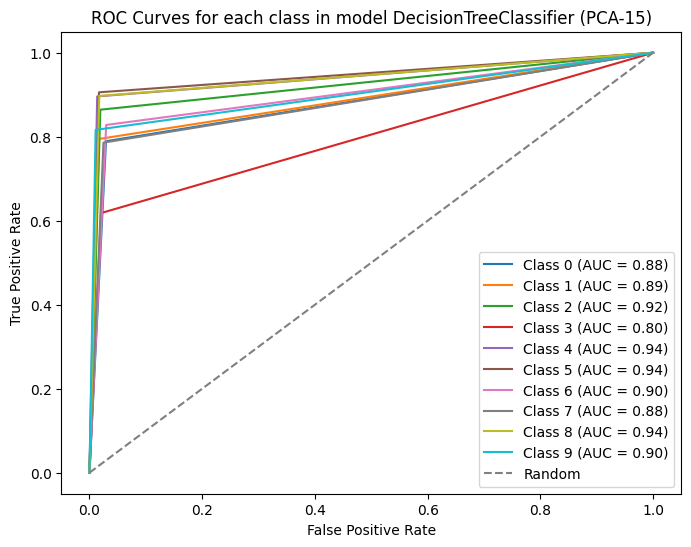

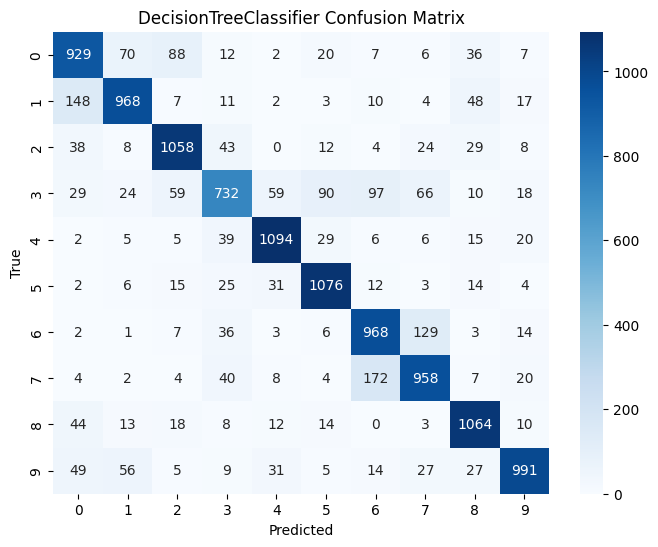


Total progress:  20%|██        | 1/5 [00:05<00:21,  5.31s/model]

RandomForestClassifier (PCA-15) - Precision: 0.9380, Recall: 0.9377, F1-Score: 0.9377, ROC AUC: 0.9970


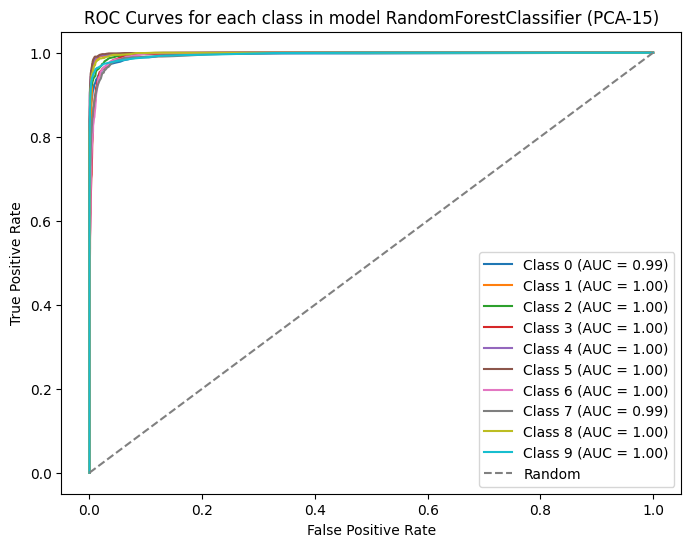

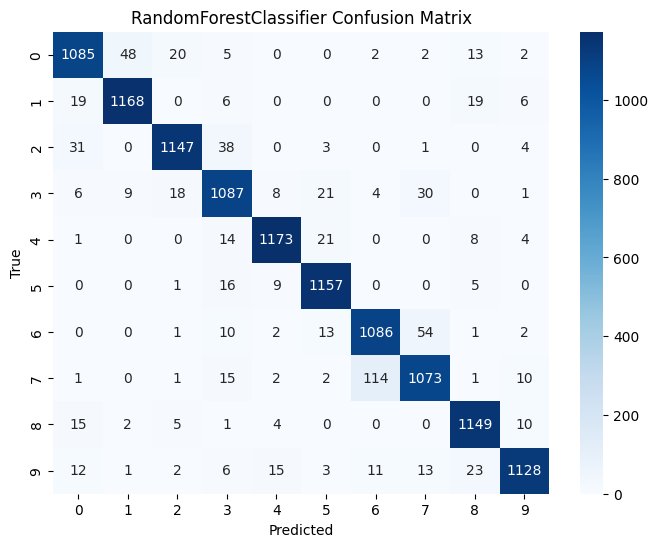


Total progress:  40%|████      | 2/5 [00:30<00:51, 17.02s/model]

MultinomialNB (PCA-15) - Precision: 0.9088, Recall: 0.9062, F1-Score: 0.9060, ROC AUC: 0.9573


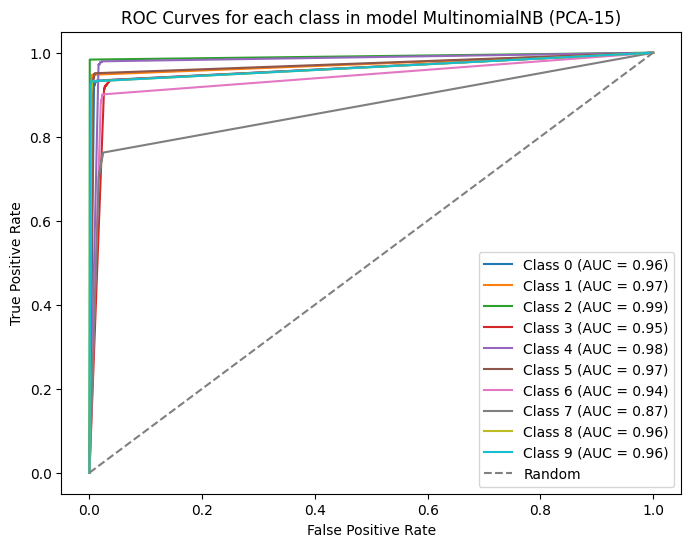

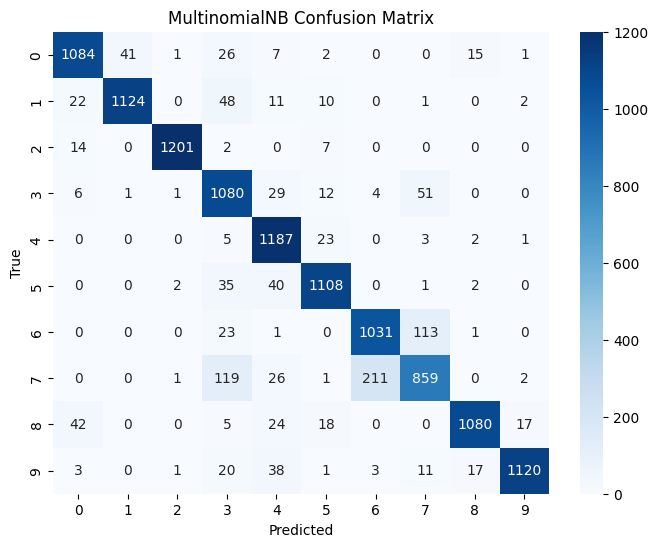


Total progress:  60%|██████    | 3/5 [00:35<00:22, 11.30s/model]

KNeighborsClassifier (PCA-15) - Precision: 0.9299, Recall: 0.9297, F1-Score: 0.9297, ROC AUC: 0.9818


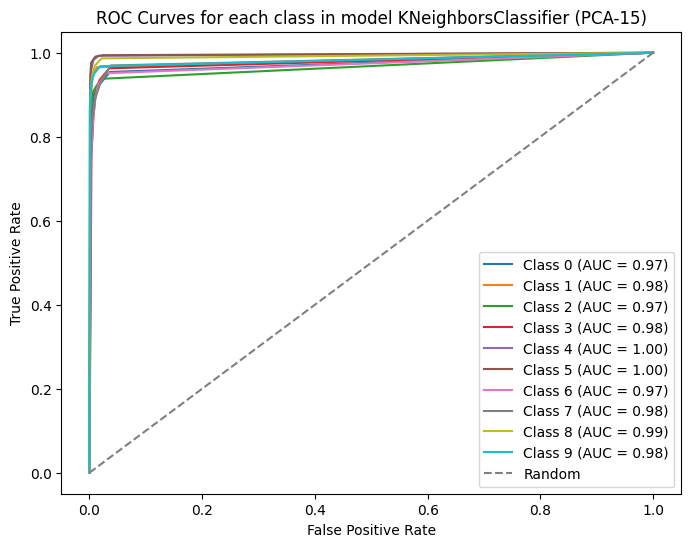

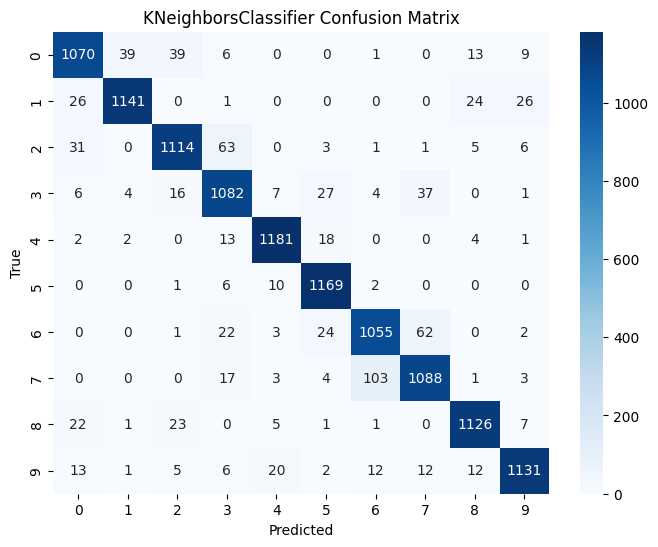


Total progress:  80%|████████  | 4/5 [00:49<00:12, 12.58s/model]

SVC (PCA-15) - Precision: 0.9154, Recall: 0.9143, F1-Score: 0.9147, ROC AUC: 0.9947


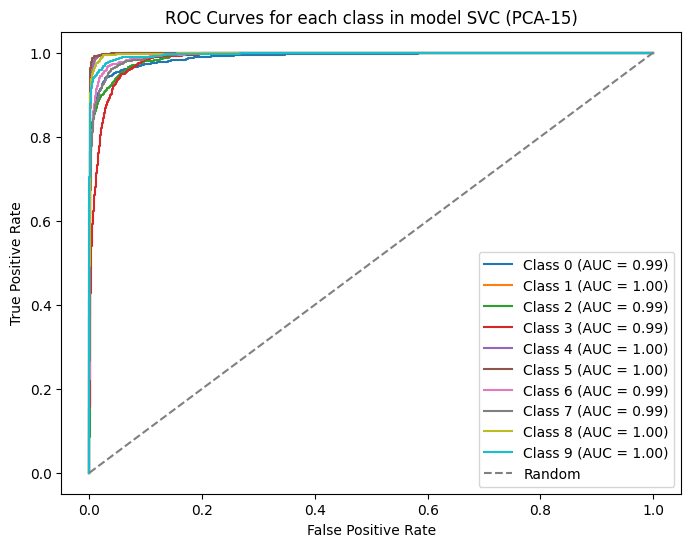

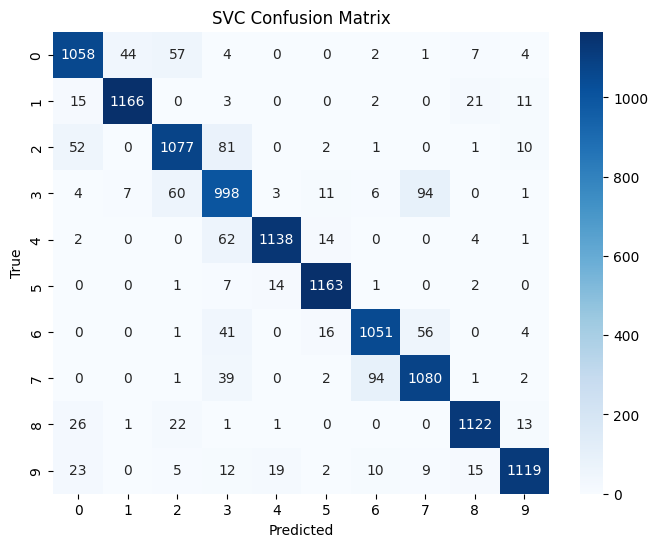


Total progress:   0%|          | 0/5 [00:00<?, ?model/s]

DecisionTreeClassifier (PCA-20) - Precision: 0.8070, Recall: 0.8066, F1-Score: 0.8056, ROC AUC: 0.8926


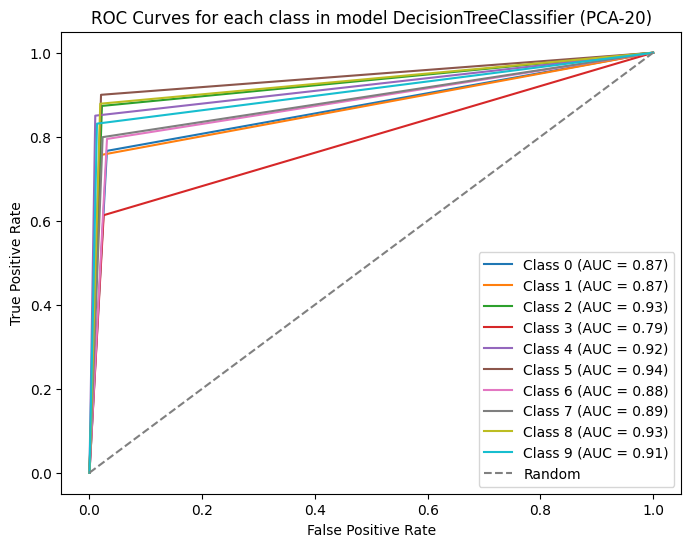

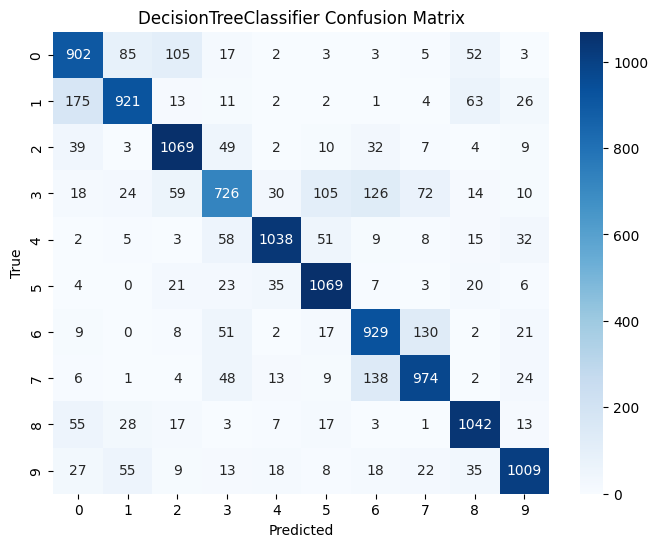


Total progress:  20%|██        | 1/5 [00:04<00:18,  4.55s/model]

RandomForestClassifier (PCA-20) - Precision: 0.9305, Recall: 0.9301, F1-Score: 0.9301, ROC AUC: 0.9964


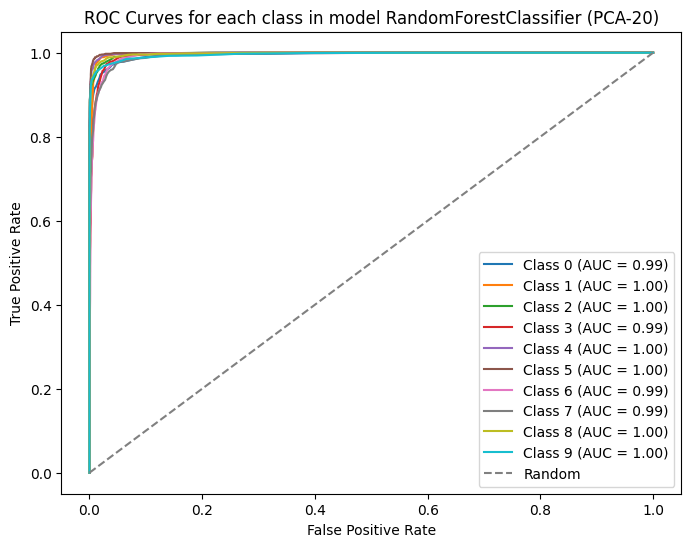

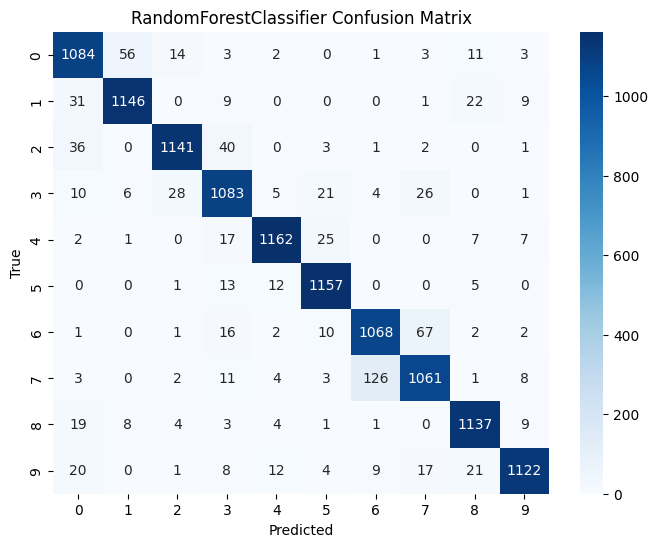


Total progress:  40%|████      | 2/5 [00:39<01:06, 22.22s/model]

MultinomialNB (PCA-20) - Precision: 0.9088, Recall: 0.9062, F1-Score: 0.9060, ROC AUC: 0.9573


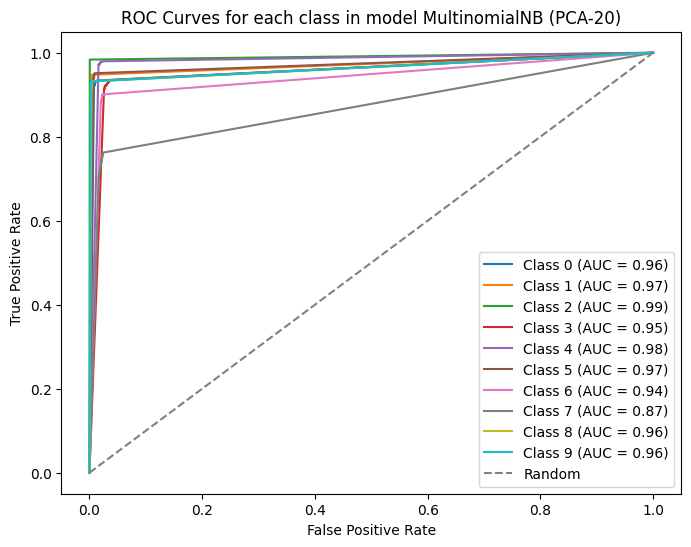

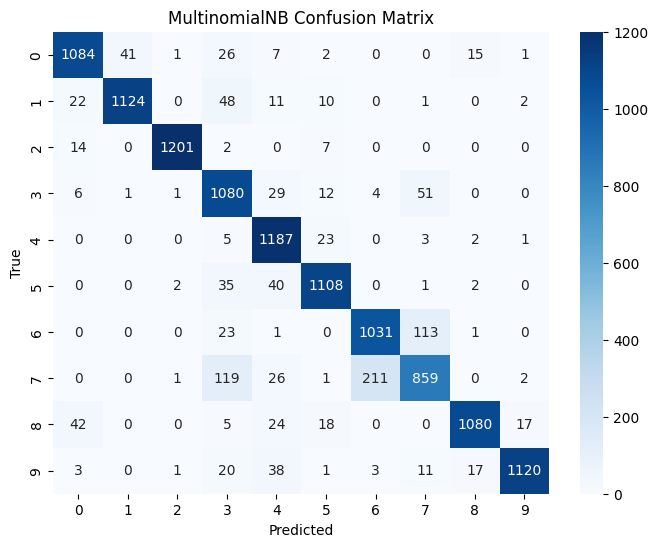


Total progress:  60%|██████    | 3/5 [00:43<00:28, 14.19s/model]

KNeighborsClassifier (PCA-20) - Precision: 0.9047, Recall: 0.9035, F1-Score: 0.9035, ROC AUC: 0.9755


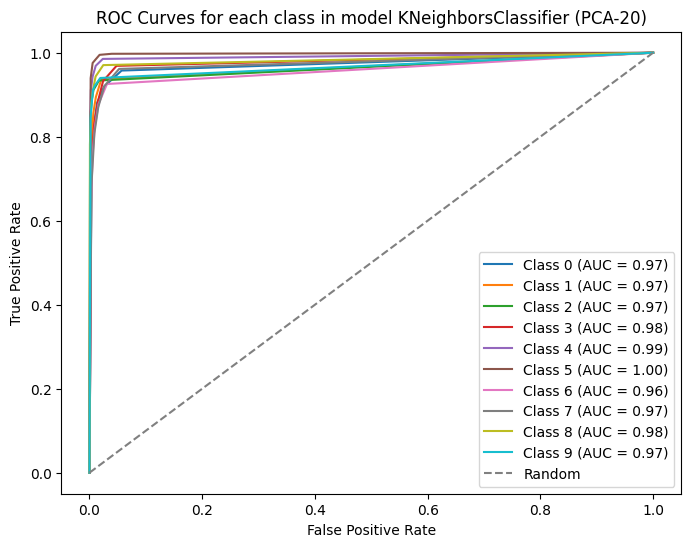

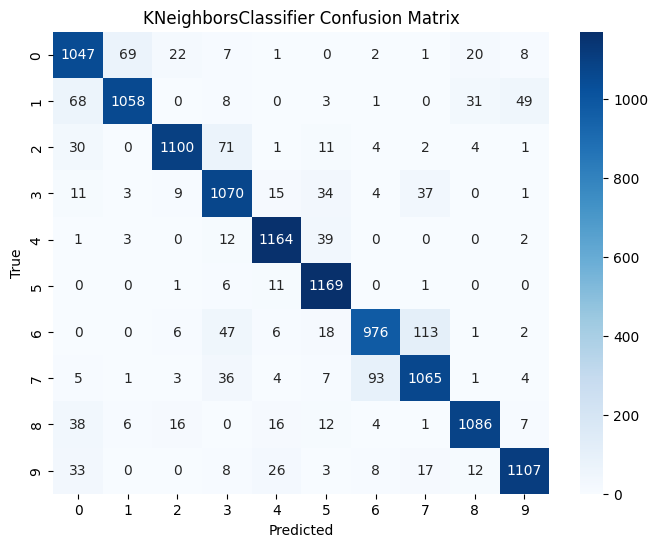


Total progress:  80%|████████  | 4/5 [00:52<00:12, 12.13s/model]

SVC (PCA-20) - Precision: 0.8890, Recall: 0.8852, F1-Score: 0.8862, ROC AUC: 0.9918


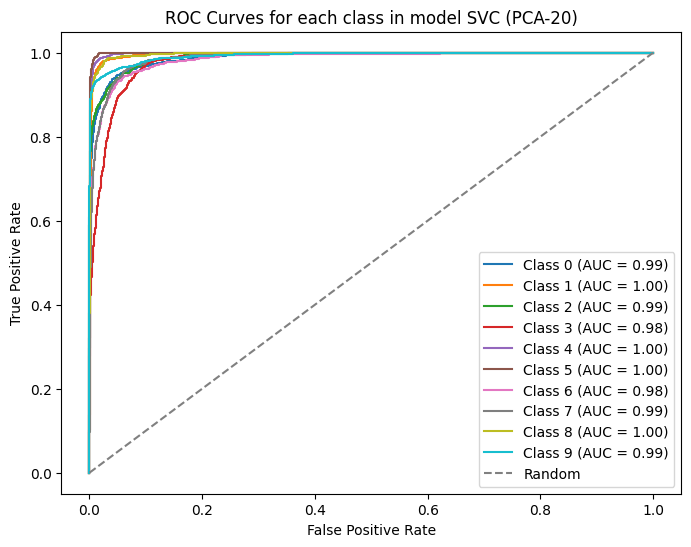

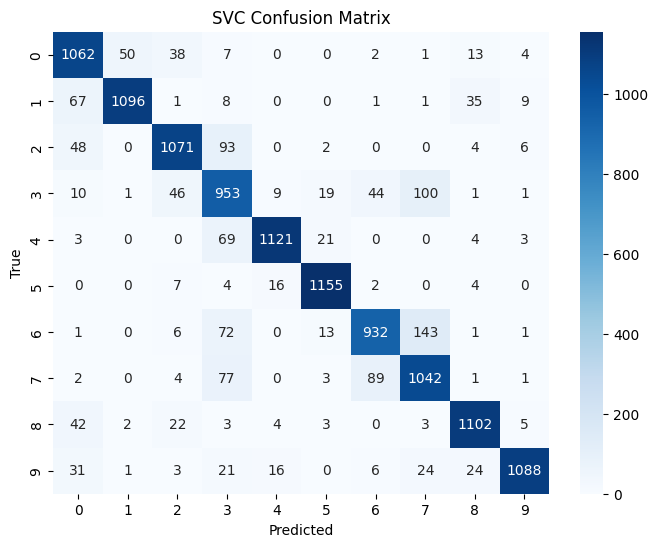


Total progress:   0%|          | 0/5 [00:00<?, ?model/s]

DecisionTreeClassifier (PCA-25) - Precision: 0.7834, Recall: 0.7823, F1-Score: 0.7816, ROC AUC: 0.8791


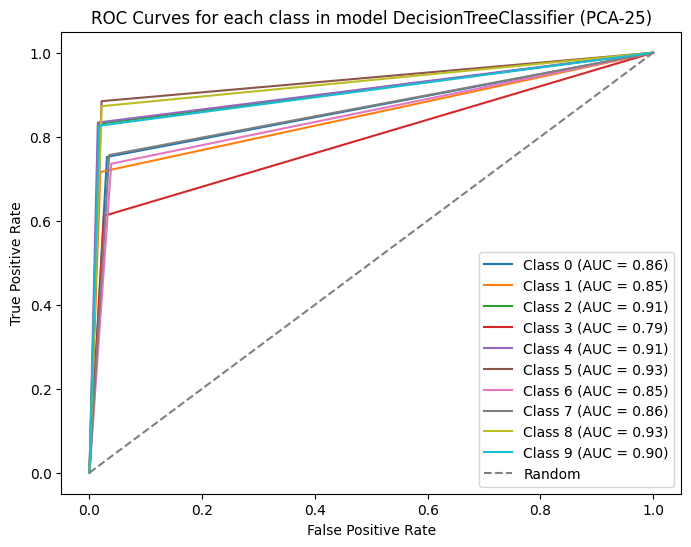

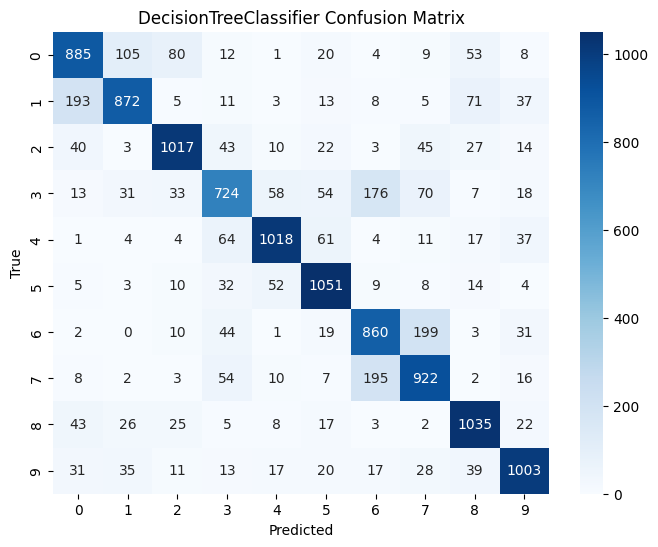


Total progress:  20%|██        | 1/5 [00:05<00:21,  5.36s/model]

RandomForestClassifier (PCA-25) - Precision: 0.9226, Recall: 0.9220, F1-Score: 0.9220, ROC AUC: 0.9956


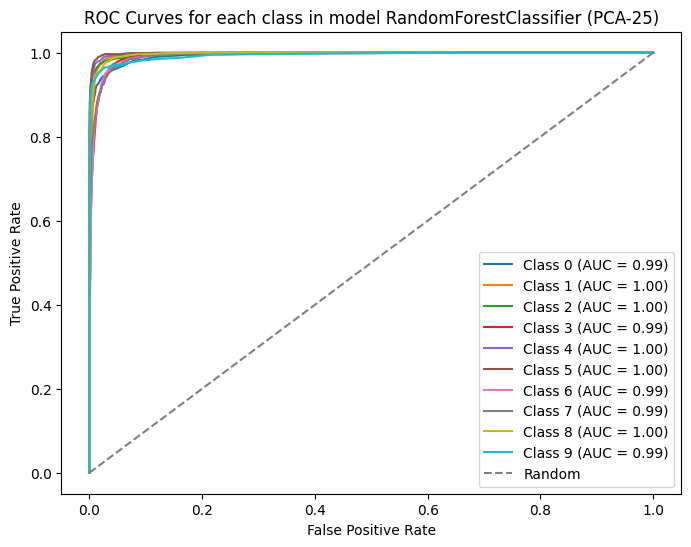

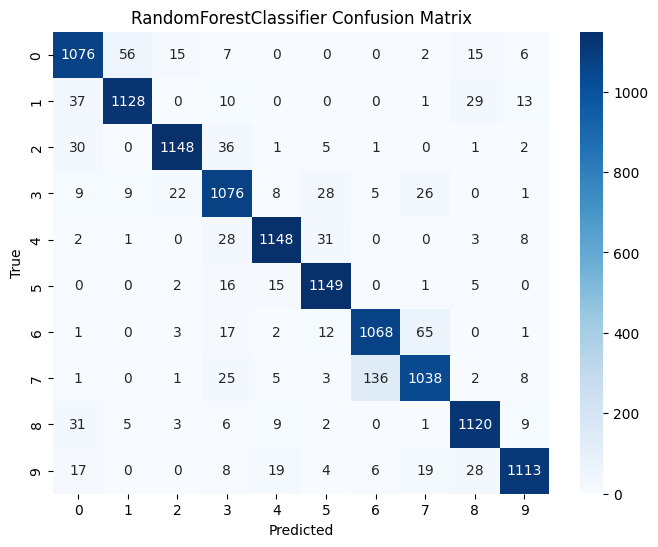


Total progress:  40%|████      | 2/5 [00:48<01:22, 27.63s/model]

MultinomialNB (PCA-25) - Precision: 0.9088, Recall: 0.9062, F1-Score: 0.9060, ROC AUC: 0.9573


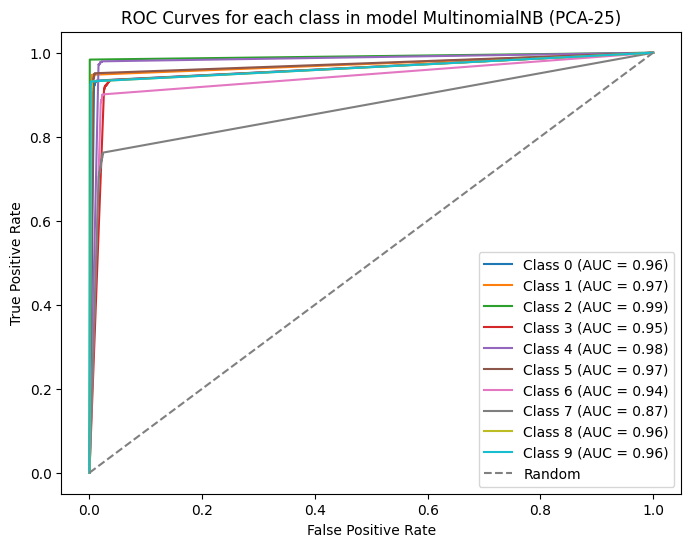

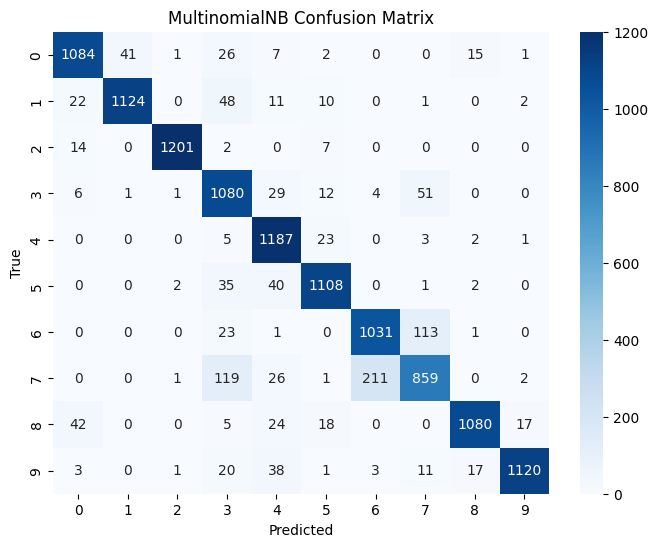


Total progress:  60%|██████    | 3/5 [00:52<00:33, 16.94s/model]

KNeighborsClassifier (PCA-25) - Precision: 0.8744, Recall: 0.8722, F1-Score: 0.8723, ROC AUC: 0.9636


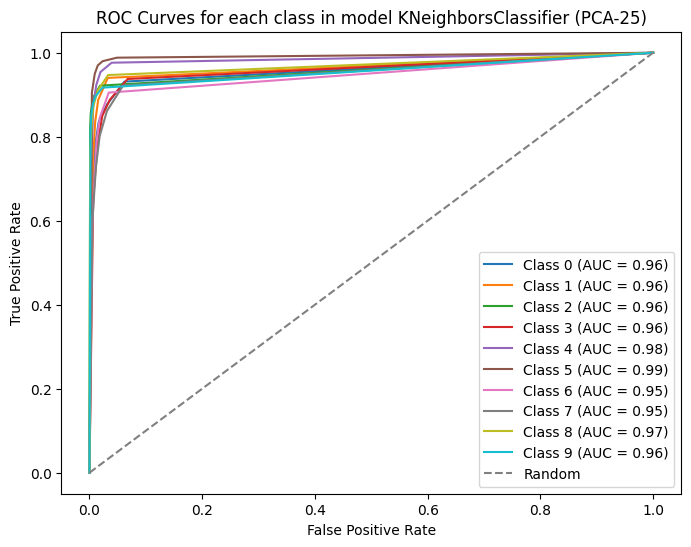

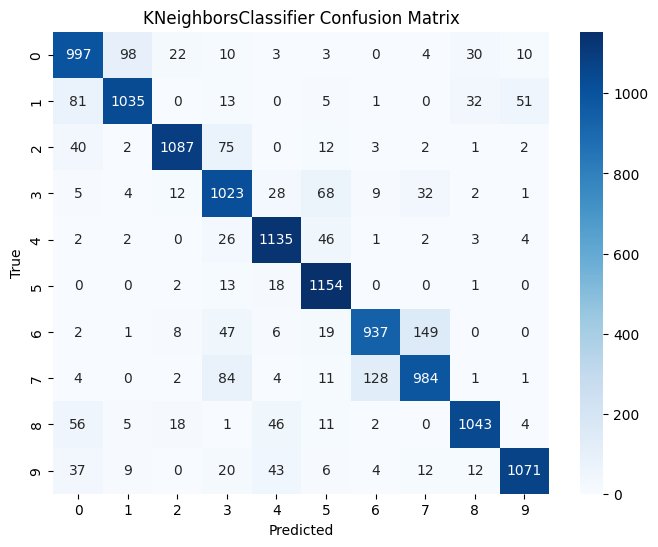


Total progress:  80%|████████  | 4/5 [01:00<00:13, 13.35s/model]

SVC (PCA-25) - Precision: 0.8672, Recall: 0.8631, F1-Score: 0.8644, ROC AUC: 0.9872


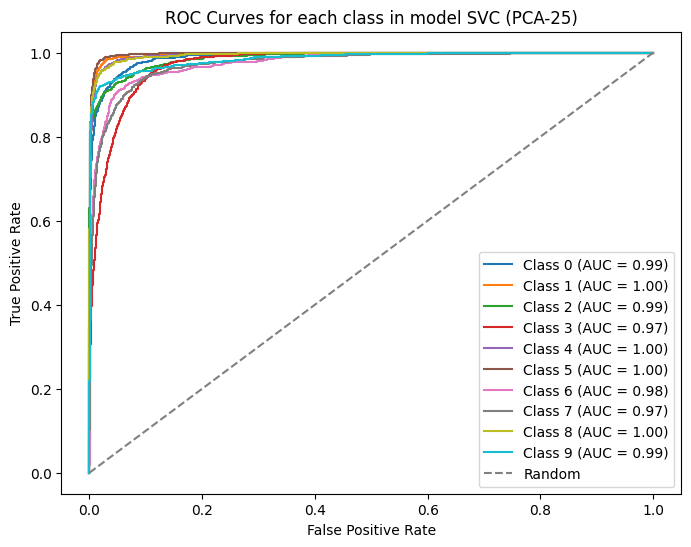

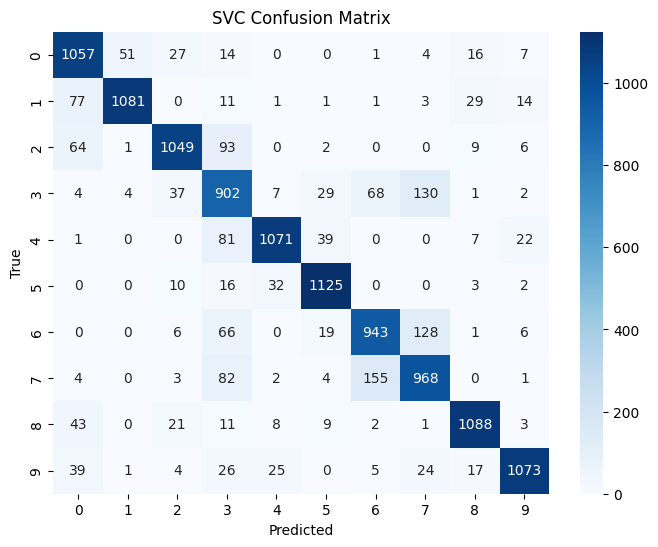


Total progress:   0%|          | 0/5 [00:00<?, ?model/s]

DecisionTreeClassifier (PCA-30) - Precision: 0.7862, Recall: 0.7853, F1-Score: 0.7842, ROC AUC: 0.8808


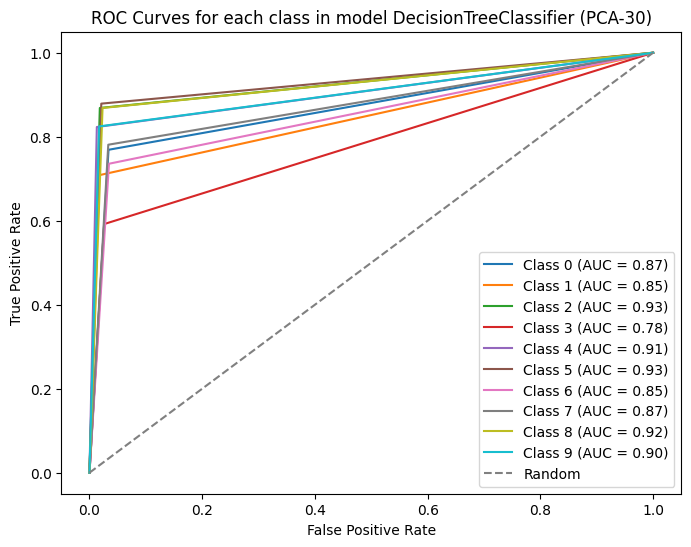

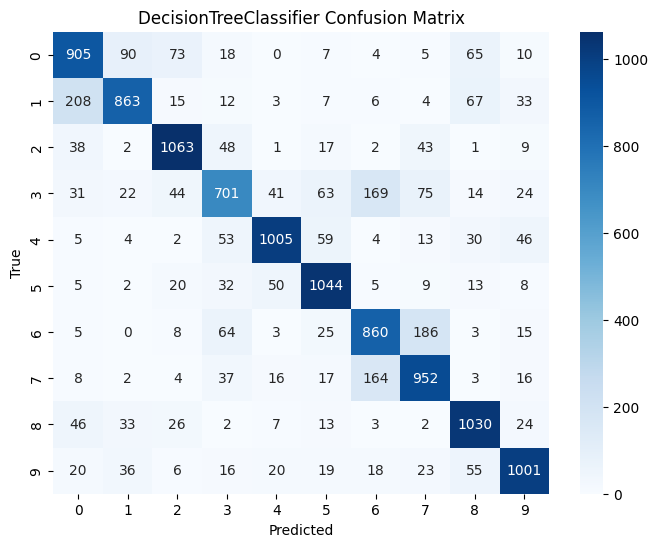


Total progress:  20%|██        | 1/5 [00:06<00:27,  6.81s/model]

RandomForestClassifier (PCA-30) - Precision: 0.9189, Recall: 0.9183, F1-Score: 0.9183, ROC AUC: 0.9950


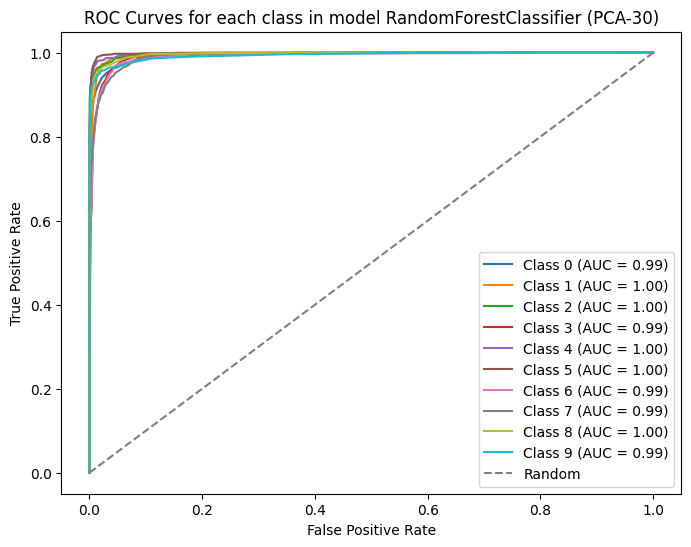

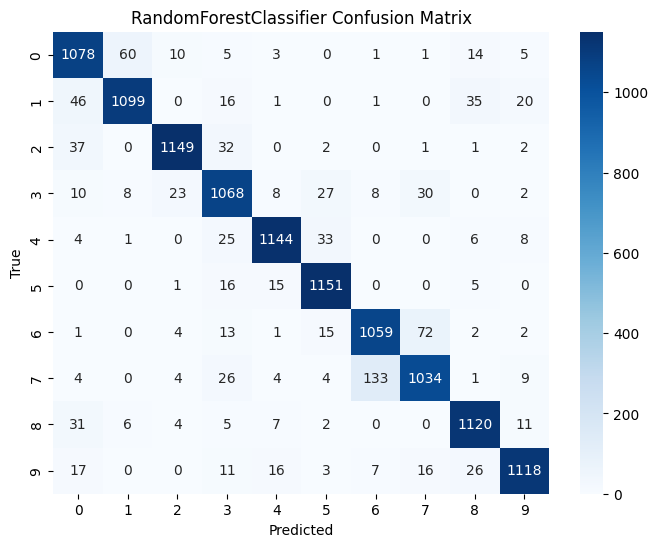


Total progress:  40%|████      | 2/5 [00:49<01:24, 28.18s/model]

MultinomialNB (PCA-30) - Precision: 0.9088, Recall: 0.9062, F1-Score: 0.9060, ROC AUC: 0.9573


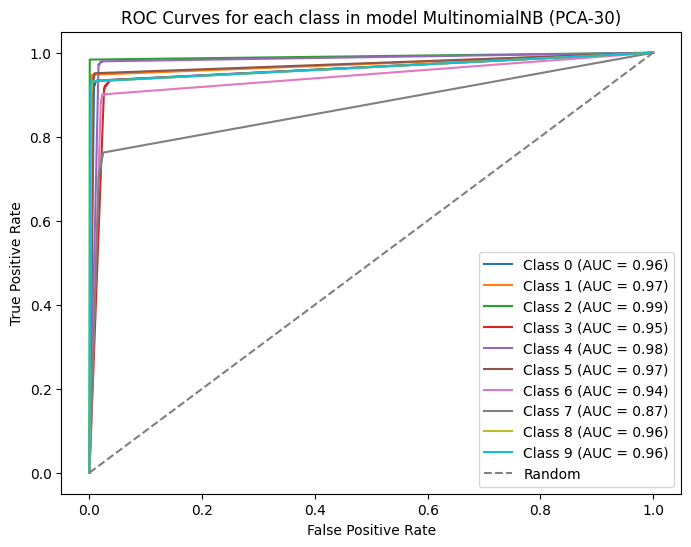

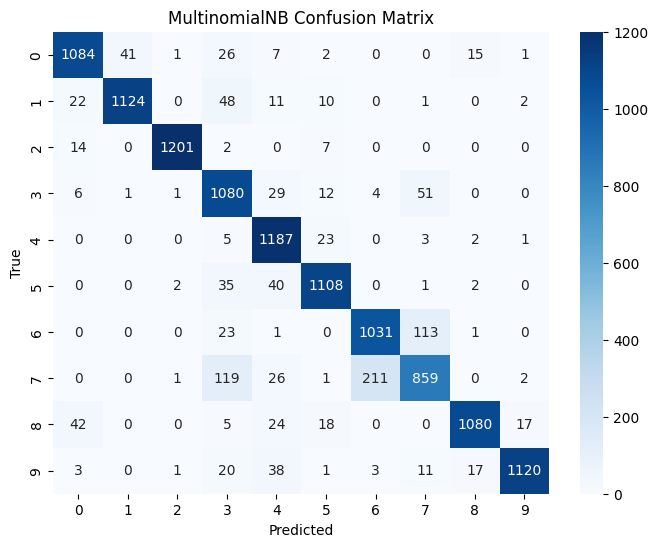


Total progress:  60%|██████    | 3/5 [00:54<00:34, 17.34s/model]

KNeighborsClassifier (PCA-30) - Precision: 0.8646, Recall: 0.8621, F1-Score: 0.8622, ROC AUC: 0.9613


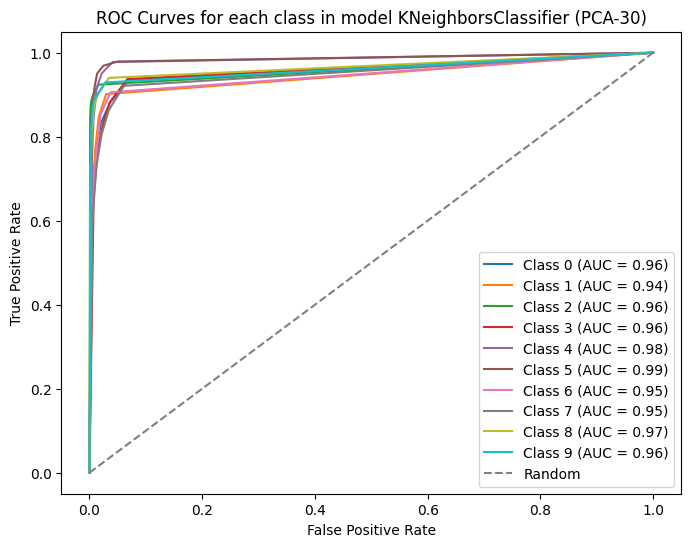

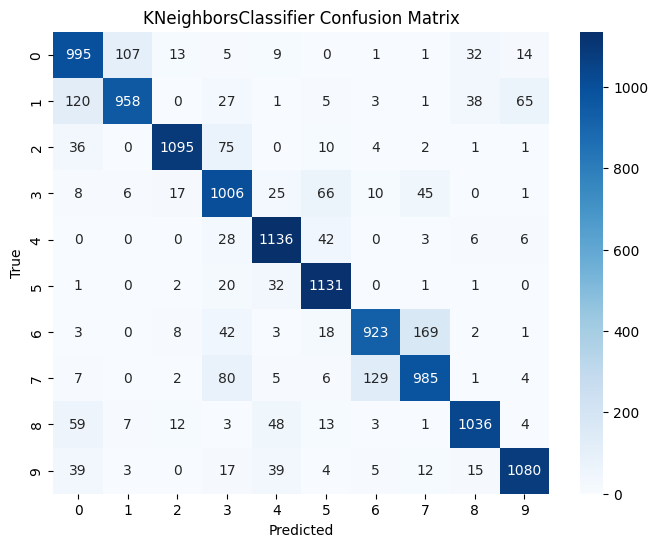


Total progress:  80%|████████  | 4/5 [01:02<00:13, 13.67s/model]

SVC (PCA-30) - Precision: 0.8584, Recall: 0.8531, F1-Score: 0.8542, ROC AUC: 0.9868


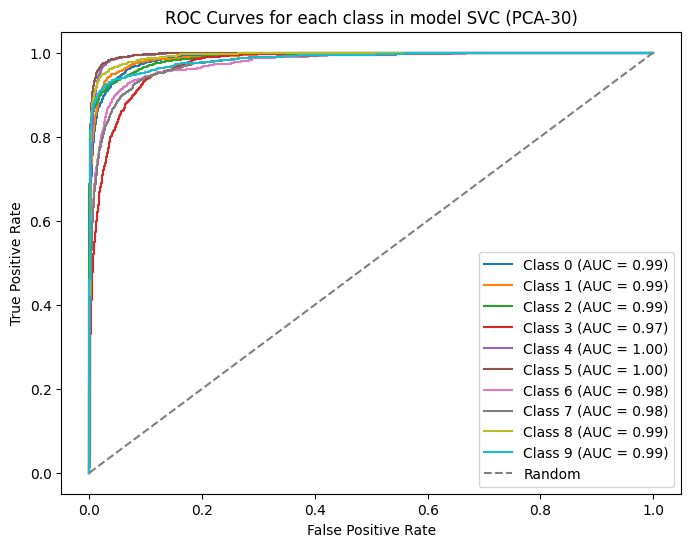

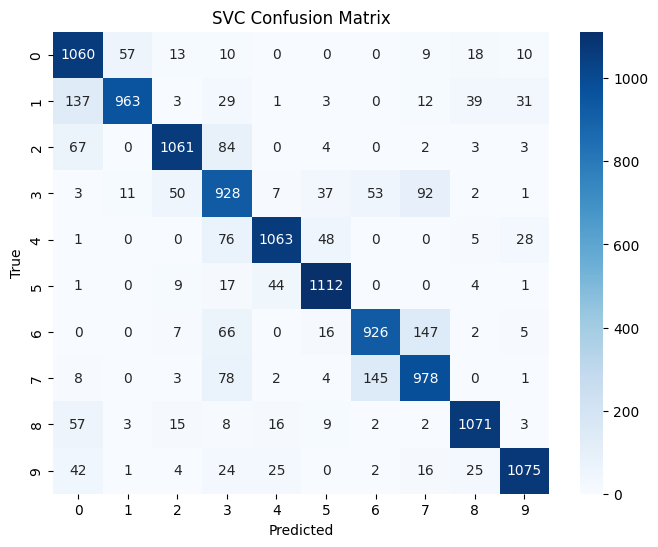


PCA Component: 100%|██████████| 5/5 [11:41<00:00, 140.33s/Dimention]


In [3]:

# Flatten the image data
def flatten_data(data):
    return data.reshape(data.shape[0], -1)

# Initialize PCA with the desired number of components
def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Train a classifier and return evaluation metrics
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, model_name, n_components):

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate ROC-AUC score
    y_prob = classifier.predict_proba(X_test)

    # Define the class names based on the dataset
    class_names = np.unique(y_train)

    # Check the shape of y_prob
    if y_prob.ndim == 1:
        # If it's a 1D array, reshape it to a 2D array
        y_prob = y_prob.reshape(-1, 1)

    # Calculate ROC-AUC and prepare data for ROC curve plotting
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Prepare ROC curve data
    roc_auc_data = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc,
        "class_names": class_names,
        "n_classes": n_classes,
    }

    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

    print(f"{model_name} (PCA-{n_components}) - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

    results = {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "roc_auc": roc_auc,
        "roc_auc_data": roc_auc_data,
        "Confusion Matrix": confusion_matrix_result,
    }

    return results

# Function to plot ROC curves
def plot_roc_curves(roc_auc_data):
    plt.figure(figsize=(8, 6))
    for i in range(roc_auc_data["n_classes"]):
        plt.plot(
            roc_auc_data["fpr"][i],
            roc_auc_data["tpr"][i],
            label=f'Class {roc_auc_data["class_names"][i]} (AUC = {roc_auc_data["roc_auc"][i]:.2f})',
        )
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves for each class in model {model_name} (PCA-{n_components})")
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="g",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_data, y_train, test_size=0.2, random_state=42
)

# list of classifiers to experiment and choose the best one
classifiers = [
    DecisionTreeClassifier(random_state=42, criterion="entropy"),
    RandomForestClassifier(random_state=42),
    MultinomialNB(),
    KNeighborsClassifier(),
    SVC(probability=True),
]

# Dictionary to store results
results_dict = {}

# Experiment with different PCA component sizes
component_sizes = [10, 15, 20, 25, 30]


for n_components in tqdm(component_sizes, desc=f"PCA Component",unit='Dimention'):
    X_train_pca = apply_pca(flatten_data(X_train), n_components)
    X_test_pca = apply_pca(flatten_data(X_test), n_components)
    time.sleep(0.1)


    results = []
    for classifier in tqdm (classifiers, desc=f"Total progress",unit = 'model'):
        model_name = classifier.__class__.__name__

        if model_name == "MultinomialNB":
            # Use the MultinomialNB classifier without PCA for this specific case
            result = train_and_evaluate_classifier(
                classifier,
                flatten_data(X_train),
                y_train,
                flatten_data(X_test),
                y_test,
                model_name,
                n_components,
            )
        else:
            # For other classifiers, use PCA as before
            result = train_and_evaluate_classifier(
                classifier,
                X_train_pca,
                y_train,
                X_test_pca,
                y_test,
                model_name,
                n_components,
            )

        results.append(result)

        # Plot ROC curve
        plot_roc_curves(result["roc_auc_data"])

        # Plot confusion matrix
        plot_confusion_matrix(
            result["Confusion Matrix"], class_names=np.unique(y_train)
        )

    results_dict[f'PCA-{n_components}'] = pd.DataFrame(
        results,
        columns=[
            'Model',
            'Precision',
            'Recall',
            'F1-Score',
            'roc_auc',
            'roc_auc_data',
            'Confusion Matrix',
        ],
    )


In [22]:
for data in results_dict:
    print(data)
    print(results_dict[data])
    print('\n')


PCA-10
                    Model  Precision    Recall  F1-Score   roc_auc  \
0  DecisionTreeClassifier   0.816622  0.815750  0.814920  0.897676   
1  RandomForestClassifier   0.905648  0.905500  0.905320  0.994152   
2           MultinomialNB   0.908816  0.906167  0.905985  0.957348   
3    KNeighborsClassifier   0.888847  0.887917  0.887973  0.968591   
4                     SVC   0.888895  0.886500  0.887153  0.991653   

                                        roc_auc_data  \
0  {'fpr': {0: [0.0, 0.031414580060981245, 1.0], ...   
1  {'fpr': {0: [0.0, 9.239582370876836e-05, 9.239...   
2  {'fpr': {0: [0.0, 0.008038436662662848, 0.0080...   
3  {'fpr': {0: [0.0, 0.002032708121592904, 0.0050...   
4  {'fpr': {0: [0.0, 0.0, 0.0, 9.239582370876836e...   

                                    Confusion Matrix  
0  [[963, 64, 79, 9, 1, 2, 3, 3, 40, 13], [138, 9...  
1  [[1059, 52, 37, 5, 0, 0, 0, 4, 14, 6], [23, 11...  
2  [[1084, 41, 1, 26, 7, 2, 0, 0, 15, 1], [22, 11...  
3  [[1037, 47, 

In [28]:
for data in results_dict:
  df = results_dict[data]


In [29]:
df

Model  Precision    Recall  F1-Score   roc_auc  \
0  DecisionTreeClassifier   0.793646  0.792833  0.791911  0.884955   
1  RandomForestClassifier   0.918996  0.918250  0.918319  0.995309   
2           MultinomialNB   0.908816  0.906167  0.905985  0.957348   
3    KNeighborsClassifier   0.878367  0.876000  0.876087  0.964317   
4                     SVC   0.868189  0.864083  0.865151  0.987855   

                                        roc_auc_data  \
0  {'fpr': {0: [0.0, 0.027903538760048047, 1.0], ...   
1  {'fpr': {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.2...   
2  {'fpr': {0: [0.0, 0.008038436662662848, 0.0080...   
3  {'fpr': {0: [0.0, 0.0044349995380208816, 0.009...   
4  {'fpr': {0: [0.0, 0.0, 0.0, 9.239582370876836e...   

                                    Confusion Matrix  
0  [[903, 96, 65, 19, 2, 17, 4, 6, 58, 7], [180, ...  
1  [[1076, 55, 15, 6, 1, 1, 0, 3, 14, 6], [46, 11...  
2  [[1084, 41, 1, 26, 7, 2, 0, 0, 15, 1], [22, 11...  
3  [[1025, 87, 11, 9, 5, 0, 1, 2, 25, 12], [81, 1...  
4  [[1080, 48, 13, 11, 0, 0, 0, 4, 11, 10], [88, ...

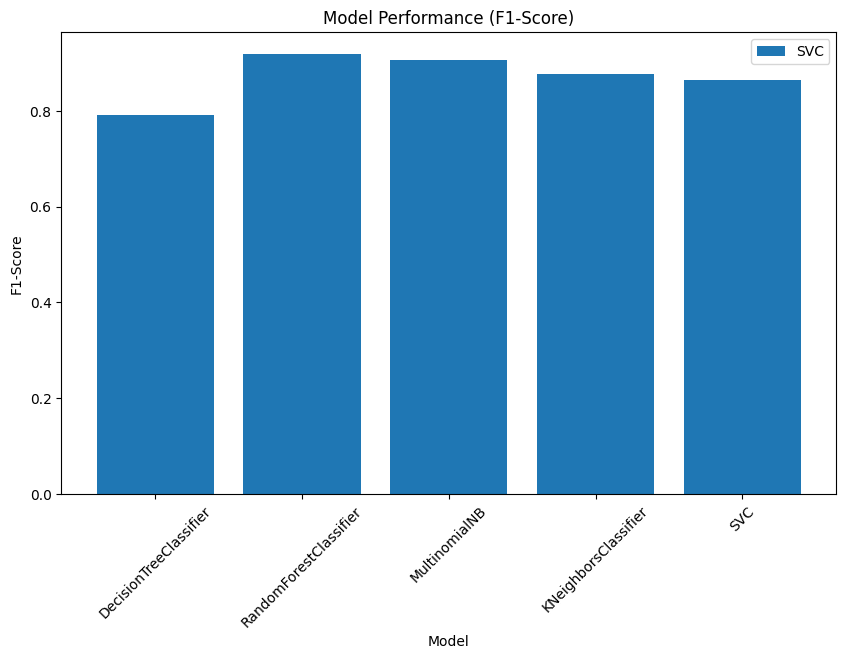

In [35]:


# Step 7: Visualize Model Performance (example: F1-Score vs. Model)
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['F1-Score'], label=model_name)

plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Model Performance (F1-Score)')
plt.xticks(rotation=45)
plt.show()

##further analysis that can be done

Hyperparameter Tuning:

Use techniques like GridSearchCV to perform hyperparameter tuning for each classifier. This helps in finding the optimal hyperparameters for better model performance.
Feature Scaling:

For some algorithms, especially KNeighborsClassifier and SVM, feature scaling can significantly impact performance. Consider applying feature scaling to your data before training these models.
Cross-Validation:

Implement cross-validation during model training. This ensures that your model's performance is consistent across different subsets of your training data and provides a more reliable estimate of its generalization performance.
Ensemble Methods:

Experiment with ensemble methods, such as bagging and boosting. Combining multiple models can often improve overall performance.
Learning Curves:

Plot learning curves to visualize how your models' performance changes with the size of the training set. This can help identify issues like overfitting or underfitting.
Threshold Adjustment:

Depending on the specific requirements of your application, you might need to adjust the classification threshold. This can impact metrics like precision and recall.
Model Comparison Visualization:

Create visualizations (e.g., bar charts or tables) to compare the performance of different models across various metrics. This can help in making an informed decision about which model is performing better.
Final Model Selection:

Based on the collective analysis of hyperparameter tuning, cross-validation results, and comparison of different models, make a final decision on the model that best suits your needs.
Documentation:

Document the entire process, including the rationale behind model selection, any challenges faced, and the final chosen model. This documentation will be valuable for future reference.
Deployment Considerations:

If you plan to deploy the model, consider the ease of deployment for each chosen model. Some models may be more suitable for deployment in different environments.
Validation on Real-world Data:

If available, validate your chosen model on real-world data or a separate validation dataset. This provides additional confidence in its performance.